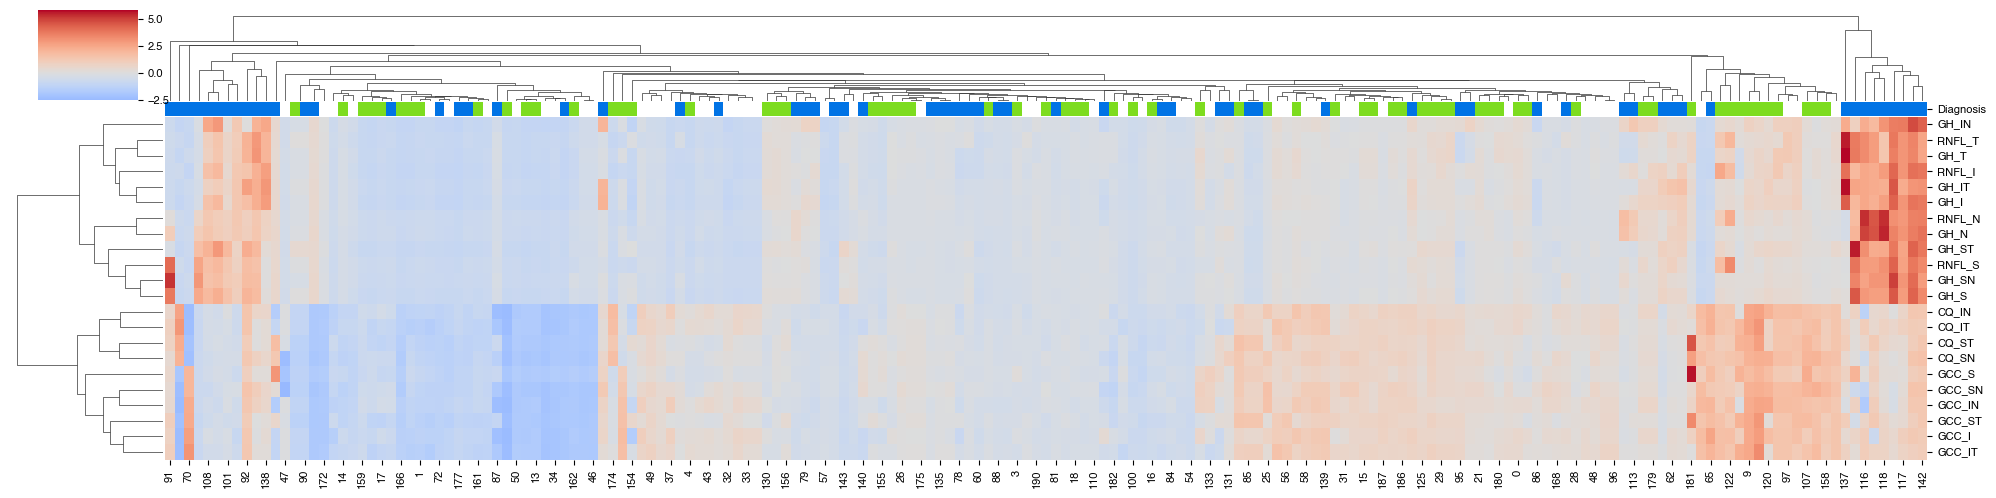

In [50]:



import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sys.path.insert(1, "../../mmytoolbox/")
from ToolBox import *



df = pd.read_csv("../data/data1102.csv")

# drop columns with RimProf_
df = df[df.columns.drop(list(df.filter(regex='RimProf')))]

# get id for each eye
df = df.dropna(subset=['Subject ID'])
df['ID'] = df['Subject ID'].astype(int).astype(str) + '.' + df['Eye']
df.groupby('Diagnosis')['ID'].nunique()

# tidy up 'not controls' 
df = df.replace({"Not control": "Not Control", "not control": "Not Control"})

dvars = [col for col in df.columns if col.startswith("FPF_")]
dvars_clean = [dvar.split("_")[1] + "_" + dvar.split("_")[-1] for dvar in dvars]
df.rename(columns=dict(zip(dvars, dvars_clean)), inplace=True)

dvars = dvars_clean  # use new dvars from now on.
dvars = ['RNFL_T', 'RNFL_S', 'RNFL_N', 'RNFL_I', 'GH_ST', 'GH_SN', 'GH_N', 'GH_IN',
'GH_IT',
'GH_T',
'GH_S',
'GH_I',
'GCC_ST',
'GCC_S',
'GCC_SN',
'GCC_IN',
'GCC_I',
'GCC_IT',
'CQ_ST',
'CQ_SN',
'CQ_IN',
'CQ_IT']
ivars = ['ID', 'Visit_no', 'Diagnosis', 'Age']
data = df[ ivars + dvars ].copy()
data = fill_nans_with_means(data, columns=dvars, group='Diagnosis')

diagnosis_colors_lut = dict(zip(['ODD', 'NAION', 'Control'], ['#0073e5', '#7ddc1f', '#ffffff']))
diagnosis_colors = data.Diagnosis.map(diagnosis_colors_lut)

scaled_data = data.copy()
ctrl_data = data[data['Diagnosis']=='Control']
scaled_data[dvars] = standardize_to_controls(data[dvars], ctrl_data[dvars])
clumap = sns.clustermap(data[dvars].T, z_score=0, cmap='coolwarm', center=0, figsize=(20,5), dendrogram_ratio=(.08,.2), col_colors=diagnosis_colors)


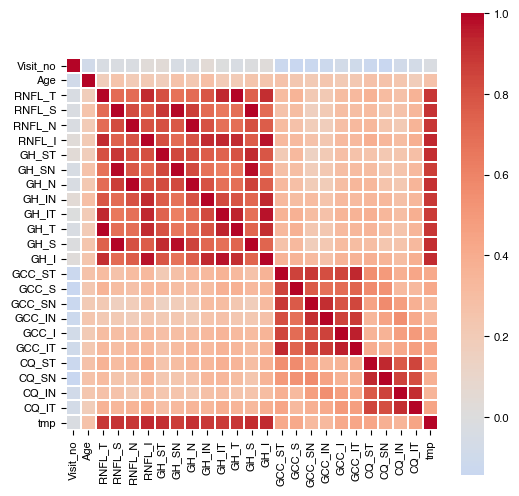

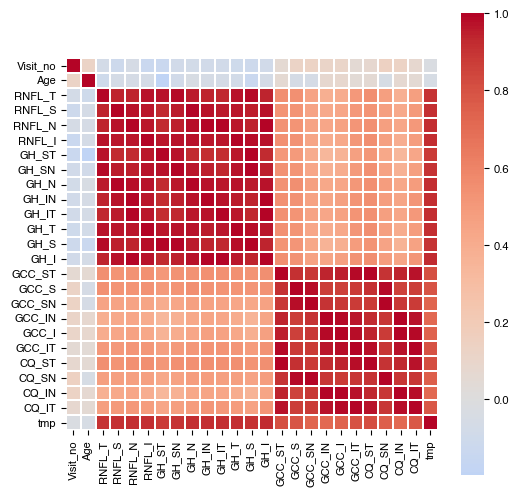

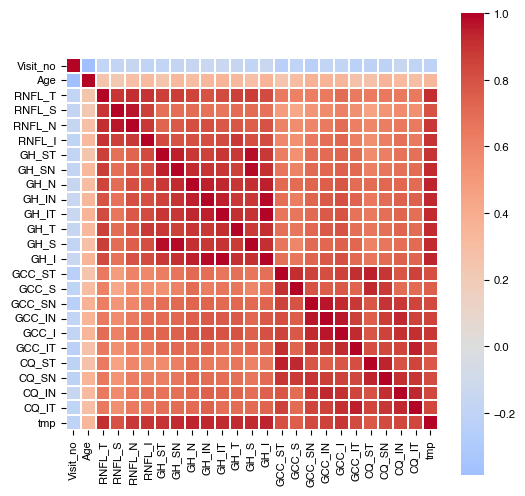

In [59]:
fontSet(fontsize=8)

for diagnosis in ['ODD', 'Control', 'NAION']:
    corr_age_fpf = data[data['Diagnosis']==diagnosis].corr(numeric_only=True)
    plt.figure(figsize=(6,6))
    htmap = sns.heatmap(corr_age_fpf, cmap='coolwarm', linewidths=.1, center=0, square=True)
    plt.show()


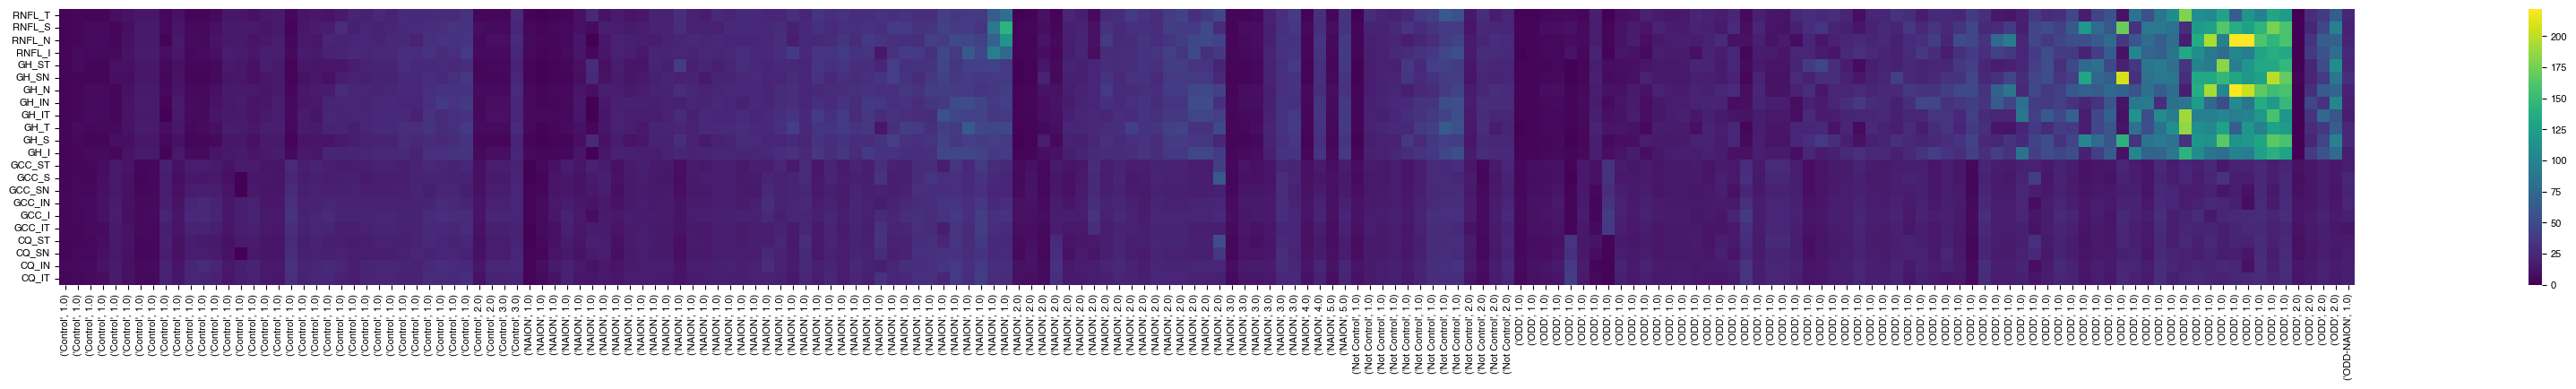

In [61]:
data['tmp'] = data[dvars].mean(axis=1)
fpf_visno = data.sort_values(by=['Diagnosis', 'Visit_no', 'tmp'])
fpf_visno.index = fpf_visno[['Diagnosis', 'Visit_no']]
plt.figure(figsize=(50,4))
sns.heatmap(fpf_visno[dvars].T, cmap='viridis', square=True)
plt.show()

In [62]:
from ToolBox import *
